## This Notebook Answers Question 4, 7, 11, 13, 14, and 16 in the Stage C Assessment 

### Problem Statement


The aim of this project is to build a binary classification model to predict if a grid is stable or unstable 


### Dataset 

UCI Electrical Grid Stability Simulated dataset

Provided by:https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+


### Dataset Content

- 14 features 
    - 12 primary predictive features 
    - 2 dependent variable
    
***Dataset `feature` explanation***

***Predictive Feature***

- `'tau1' to 'tau4':` the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes)

- `'p1' to 'p4':` nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4)

- `'g1' to 'g4':` price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma')


***Dependent Variables***

- `'stab':` the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable)

- `'stabf':` a categorical (binary) label ('stable' or 'unstable')




### First instructions to be followed before work begins 

1. Splitting the data to:
    - 80% training set
    - 20% testing set 
2. Using Random state to be = 1 for all the models
3. Using Standard Scaler to transform the training and testing set 
4. Training the data with Random Forest and extra trees classifier 
5. Using xgboost to train an extreme boosting model
6. Using lightgbm to train a light gradient boosting model
7. Evaluate on the test set 

## PROJECT WOKRFLOW 

# Step 1: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Step 2: Importing the dataset 

In [2]:
# Import the data

uci_data = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
uci_data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


# Step 3: Exploring  and Visualize the Dataset

In [4]:
# checking for missing data

uci_data.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

    NO MISSING VALUES

In [5]:
# checking the descriptive statistics of the dataset 

uci_data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
# checking the info of the data 

uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


`From the dataset, we have two target variables. Since the two target variables have the same attributes, we can as well drop one and place our focus the other.`

In this case, **stab as target variable** will be dropped for **stabf as the main target varible**.



In [7]:
# Dropping the stab 

new_uci_data = uci_data.drop('stab', axis=1)

In [8]:
new_uci_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [9]:
# checking the label distribution of the target varible

new_uci_data.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

Text(0.5, 0, 'Number of Occurence')

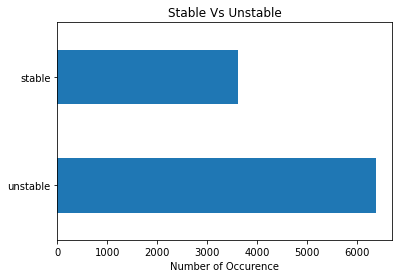

In [10]:
# Plotting the bar chart for each category distribution

fig = new_uci_data.stabf.value_counts().plot.barh()
fig.set_title('Stable Vs Unstable')
fig.set_xlabel('Number of Occurence')

`This is imbalance in the label distribution. Which of course will be handled later as we progress in building the model`

# Step 4: Preparing the data for training/Data cleaning 

**Exploring the target variable**

Getting more insights on the target varible (stabf)

We have two labels:
   - stable
   - unstable 
   
We would be exploring the labels

In [11]:
# encoding the target varible
# using onehotencoder 
# from sklearn 

from sklearn.preprocessing import LabelEncoder

In [12]:
# instanting the encoder 

encoder = LabelEncoder()

In [13]:

new_uci_data.stabf = encoder.fit_transform(new_uci_data.stabf)

In [14]:
new_uci_data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [15]:
# dividing the along independent and dependent line

X = new_uci_data.drop('stabf', axis=1)
y = new_uci_data['stabf']

In [16]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [17]:
y

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: stabf, Length: 10000, dtype: int64

In [18]:
# splitting the data to training and testing data set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1)

In [19]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,9.504984,5.265415,2.029617,8.026334,3.449756,-0.922754,-1.526305,-1.000696,0.191864,0.611297,0.080008,0.350312
7813,8.035818,4.632548,1.177810,1.204950,4.093208,-1.568218,-0.819966,-1.705024,0.223384,0.317770,0.726623,0.441620
905,7.052560,3.264057,1.405949,4.497549,3.741358,-0.629026,-1.407945,-1.704387,0.868306,0.605566,0.100591,0.747320
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488


In [20]:
X_test

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314
...,...,...,...,...,...,...,...,...,...,...,...,...
3919,8.320531,3.394352,1.468729,8.766874,3.940123,-1.599081,-0.931023,-1.410020,0.657445,0.493384,0.178907,0.173240
162,2.290102,3.028512,8.071234,6.169944,3.624592,-1.104003,-0.820951,-1.699638,0.785595,0.770194,0.234290,0.225070
7903,7.848945,0.684889,0.728223,6.702948,2.599685,-0.563497,-1.210069,-0.826119,0.185122,0.559799,0.682418,0.886902
2242,2.173967,5.776797,4.597638,6.399330,2.869349,-0.931891,-1.237955,-0.699503,0.942680,0.743103,0.152161,0.305183


In [21]:
# checking the target distribution of the y_train

y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

Since we will be training our model with training dataset, from the above outcome, there is an imbalance in the class distribution of the target variable 


**We will be over sampling the fewer class to overwrite the imbalance in the target varible**

In [22]:
# checking the target distribution of the y_test

y_test.value_counts()

1    1288
0     712
Name: stabf, dtype: int64

In [23]:
# Handling the imbalance in the labels distribution 

import imblearn
from imblearn.over_sampling import SMOTE


In [24]:
# instantiating the smote 

smote = SMOTE(random_state=1)

In [25]:
# fitting and balancing the distributions of the labels

X_train_balanced, y_balanced = smote.fit_sample(X_train, y_train)




In [26]:
y_balanced.value_counts()

0    5092
1    5092
Name: stabf, dtype: int64

In [27]:
y_balanced.head(20)

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    0
19    1
Name: stabf, dtype: int64

**standardizing both the training and testing dataset of the predictor variables**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# instantiating the scaler 

scaler = StandardScaler()

In [30]:
stand_x_train = scaler.fit_transform(X_train_balanced)

In [31]:
# making a dataframe for the standardised data

X_train_df = pd.DataFrame(stand_x_train,
                          columns=X_train_balanced.columns)

X_train_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.431352,-0.906078,0.709472,1.601487,-0.299634,0.070986,1.327370,-0.875325,0.227072,0.416592,0.675795,0.567770
1,0.007043,0.151748,1.089400,-1.545174,0.636265,-0.061013,-1.541948,0.492481,-0.241282,-1.540004,1.547891,-1.427980
2,-1.371213,1.340884,-0.429412,1.225073,-0.185676,0.510814,0.700214,-0.885831,1.504487,1.562377,-1.009660,0.568027
3,0.876060,0.585001,1.350743,-1.052290,-0.835039,-0.774873,1.560992,0.669318,-0.927397,1.470053,1.728175,0.344110
4,0.724152,-1.338448,0.375461,0.981443,-1.658064,0.787290,1.458851,0.649251,1.790768,0.783310,1.246050,-1.292976
...,...,...,...,...,...,...,...,...,...,...,...,...
10179,-0.373458,-1.117658,0.568207,-1.519188,-1.076505,0.785933,-0.001746,1.096330,-0.584156,-0.276447,0.041123,0.826954
10180,-1.451654,-0.835561,1.222408,1.185053,-1.326430,1.205379,-0.164007,1.276288,1.477809,-0.539330,-0.581280,-1.108805
10181,-0.010422,-1.306042,-1.527579,-0.549530,-1.359934,0.040556,1.035499,1.297329,0.663560,-0.452264,0.166377,-1.489641
10182,-0.267590,-1.382194,-1.213566,1.501028,0.403488,0.774435,-1.716730,0.239997,-0.882891,-0.033430,-1.215899,1.243240


Since X_train dataset has been standardised, we proceed to standardise the X_test

In [32]:
X_test

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314
...,...,...,...,...,...,...,...,...,...,...,...,...
3919,8.320531,3.394352,1.468729,8.766874,3.940123,-1.599081,-0.931023,-1.410020,0.657445,0.493384,0.178907,0.173240
162,2.290102,3.028512,8.071234,6.169944,3.624592,-1.104003,-0.820951,-1.699638,0.785595,0.770194,0.234290,0.225070
7903,7.848945,0.684889,0.728223,6.702948,2.599685,-0.563497,-1.210069,-0.826119,0.185122,0.559799,0.682418,0.886902
2242,2.173967,5.776797,4.597638,6.399330,2.869349,-0.931891,-1.237955,-0.699503,0.942680,0.743103,0.152161,0.305183


In [33]:
stand_x_test = scaler.fit_transform(X_test)

In [34]:
# making a dataframe for the standardised data

X_test_df = pd.DataFrame(stand_x_test,
                          columns=X_test.columns)

X_test_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535
2,-1.086035,-0.321834,-0.873505,0.011761,-0.977094,0.094896,0.813041,0.751381,1.450284,-1.444370,0.654216,-1.679799
3,-0.087014,-1.113357,0.361518,-1.684316,0.792280,-1.649041,0.410662,-0.084473,0.066085,-1.679450,-0.349573,1.057439
4,0.873004,1.425833,0.080476,1.681022,-0.154247,-0.024315,-0.197525,0.485988,0.119716,-1.475773,0.957057,-0.817608
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.119526,-0.682371,-1.362900,1.261070,0.266377,-0.817583,0.745388,-0.370774,0.471600,-0.114316,-1.251379,-1.280864
1996,-1.084900,-0.815496,1.010385,0.326900,-0.167494,0.322284,1.002069,-1.049289,0.941736,0.899379,-1.050349,-1.091915
1997,0.947138,-1.668313,-1.629077,0.518632,-1.576793,1.566742,0.094662,0.997188,-1.261183,0.128899,0.576286,1.320848
1998,-1.127354,0.184573,-0.238207,0.409415,-1.205991,0.718553,0.029632,1.293823,1.518021,0.800172,-1.348463,-0.799858


# Step 5: Training, Testing, and Evaluating 

### Training 

Our focus would be on the following model:
   - Random Forest Classifier 
   - Extra Trees Classifier
   - xgboost 
   - lightgbm

## Here, we would answer question 4 

## Question 4

    
   ***What is the accuracy on the test set using the random forest classifier? In 4 decimal places.***

### Random forest Classifier 

We would do the following:
   - Training the model
   - Testing the model
   - And Evaluate the model 

***Training the model***

In [35]:
# importing random forest classifier 

from sklearn.ensemble import RandomForestClassifier

In [36]:
# instantiating the model 

clf = RandomForestClassifier(random_state=1)

In [37]:
# fitting the model with training dataset 

clf.fit(X_train_df, y_balanced)

RandomForestClassifier(random_state=1)

***Testing the model***

In [38]:
# making predictions with trained model 

Ran_y_preds = clf.predict(X_test_df)

In [39]:
Ran_y_preds

array([1, 1, 0, ..., 0, 0, 1])

In [40]:
len(Ran_y_preds)

2000

***Evaluating the model***

We would be evaluating on the following metrics:
   - classification_report 
   - confusion_matrix
   - accuracy_score

In [41]:
# importing metrics from sklearn 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [42]:
# printing the report on the model through classification_report 


print(classification_report(y_test, Ran_y_preds))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       712
           1       0.98      0.86      0.92      1288

    accuracy                           0.90      2000
   macro avg       0.88      0.91      0.89      2000
weighted avg       0.91      0.90      0.90      2000



In [43]:
# for confusion matrix

cm = confusion_matrix(y_test, Ran_y_preds)
cm

array([[ 685,   27],
       [ 179, 1109]])

`Showing the above result through the heat map`

Text(0.5, 15.0, 'Ground Truth')

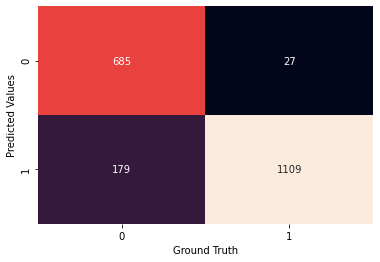

In [44]:
sns.heatmap(cm, annot=True, fmt="d", cbar = False)
plt.ylabel("Predicted Values")
plt.xlabel("Ground Truth")

In [45]:
# checking the accuracy score

score = accuracy_score(y_test, Ran_y_preds)
score

0.897

## Answer

**THE ACCURACY SCORE ON THE TEST SET IS => 0.897**

.
.
.
.
.


## Here, we would answer question 7

## Question 7

**What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.**

### LightGBM

We would do the following:
   - Training the model
   - Testing the model
   - And Evaluate the model

***Training the model***

In [46]:
# Importing the model

from lightgbm import LGBMClassifier

In [47]:
# Instantiating the model

light_model = LGBMClassifier(random_state=1)

# fitting the model

light_model.fit(X_train_df, y_balanced)

LGBMClassifier(random_state=1)

***Testing the model***

In [48]:
# checking the score of the fitted with trianed model 

from sklearn.model_selection import cross_val_score
score = cross_val_score(light_model, 
                        X_train_df,
                        y_balanced,
                        scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

In [49]:
score

array([0.940108  , 0.9509082 , 0.94894453, 0.97152676, 0.96807466])

In [50]:
round(score.mean(), 2)

0.96

In [51]:
# making predictions with model 

light_y_preds = light_model.predict(X_test_df)

In [52]:
light_y_preds

array([1, 1, 0, ..., 0, 0, 1])

***Evaluting the model***

We would be evaluating on the following metrics:

- confusion_matrix
- accuracy_score
- classification_report

In [53]:
# confusion matrix

cm = confusion_matrix(y_test, light_y_preds)


Text(0.5, 15.0, 'Ground Truth')

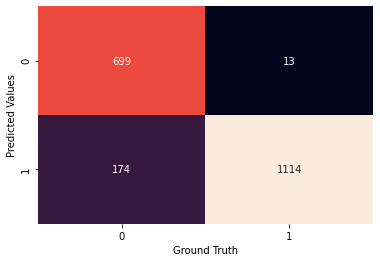

In [54]:
sns.heatmap(cm, annot=True, fmt="d", cbar = False)
plt.ylabel("Predicted Values")
plt.xlabel("Ground Truth")

In [55]:
# accuracy score

score = accuracy_score(y_test, light_y_preds)
score

0.9065

## Answer


**THE ACCURACY SCORE ON THE TEST SET IS => 0.9065**

.
.
.
.
.
.


## Here, we would answer question 11

## Question 11

**What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.**

### XGBOOST


We would do the following:
   - Training the model
   - Testing the model
   - And Evaluate the model

In [56]:
# importing xgboost

from xgboost import XGBClassifier

In [57]:
# instantiating the model

xg_model = XGBClassifier(random_state=1)

# fitting the model

xg_model.fit(X_train_df, y_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

***Testing the model***

In [58]:
# checking the score of the fitted with trianed model 

from sklearn.model_selection import cross_val_score
score = cross_val_score(xg_model, 
                        X_train_df,
                        y_balanced,
                        scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

In [59]:
score

array([0.94354443, 0.95532646, 0.95139912, 0.97496318, 0.97298625])

In [60]:
round(score.mean(), 2)

0.96

In [61]:
# making predictions with model 

xg_y_preds = xg_model.predict(X_test_df)

In [62]:
xg_y_preds

array([1, 1, 0, ..., 0, 0, 1])

***Evaluting the model***

We would be evaluating on the following metrics:

- confusion_matrix
- accuracy_score
- classification_report

In [63]:
# confusion matrix

cm = confusion_matrix(y_test, xg_y_preds)


Text(0.5, 15.0, 'Ground Truth')

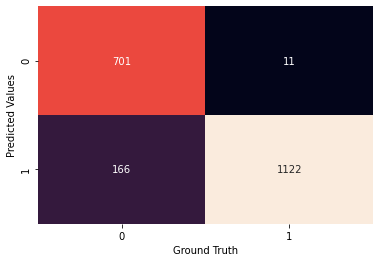

In [64]:
sns.heatmap(cm, annot=True, fmt="d", cbar = False)
plt.ylabel("Predicted Values")
plt.xlabel("Ground Truth")

In [65]:
# accuracy score

score = accuracy_score(y_test, xg_y_preds)
score

0.9115

## Answer


**THE ACCURACY SCORE ON THE TEST SET IS => 0.9115**

.........

## Here, we would answer question 13

## Question 13

**Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?**

### Extra Trees Classifier 

We would do the following:

- Training the model
- Testing the model
- And Evaluate the model

***Training the model***

In [66]:
# import extra tree classifier

from sklearn.ensemble import ExtraTreesClassifier

In [67]:
# instantiating the model

etc = ExtraTreesClassifier(random_state=1)

In [68]:
# fitting the model

etc.fit(X_train_df, y_balanced)

ExtraTreesClassifier(random_state=1)

***Testing the model***

In [69]:
etc_y_preds = etc.predict(X_test_df)

In [70]:
etc_y_preds

array([1, 1, 0, ..., 0, 0, 1])

***Evaluating the model***

We would be evaluating on the following metrics:

- confusion_matrix
- accuracy_score
- classification_report

In [71]:
# confusion matrix

cm = confusion_matrix(y_test, etc_y_preds)

Text(0.5, 15.0, 'Ground Truth')

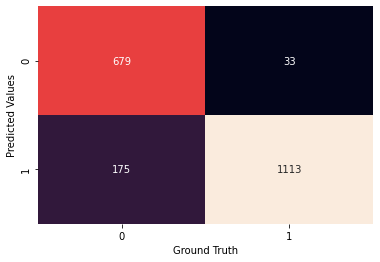

In [72]:
sns.heatmap(cm, annot=True, fmt="d", cbar = False)
plt.ylabel("Predicted Values")
plt.xlabel("Ground Truth")

In [73]:
# accuracy score

score = accuracy_score(y_test, etc_y_preds)
score

0.896

**Feature importance based on mean decrease in impurity**

In [74]:
# Getting the feature importance of the model

importances= etc.feature_importances_
importances

array([0.11971508, 0.11765325, 0.11417414, 0.11849404, 0.03701265,
       0.03779585, 0.0380866 , 0.03803685, 0.09157514, 0.09483179,
       0.09979064, 0.09283399])

In [75]:
feature_names = X_train_df.columns
feature_names

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [76]:
std = np.std([tree.feature_importances_ for tree in etc.estimators_], axis=0)
std

array([0.01013275, 0.01036498, 0.00757602, 0.00855368, 0.00352996,
       0.00339525, 0.00361567, 0.00379749, 0.00797251, 0.00680913,
       0.0079559 , 0.00805084])

In [77]:
etc_importances = pd.Series(importances, index=feature_names)
etc_importances

tau1    0.119715
tau2    0.117653
tau3    0.114174
tau4    0.118494
p1      0.037013
p2      0.037796
p3      0.038087
p4      0.038037
g1      0.091575
g2      0.094832
g3      0.099791
g4      0.092834
dtype: float64

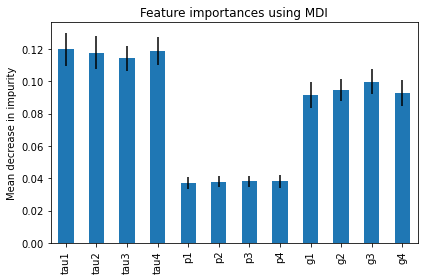

In [78]:
fig, ax = plt.subplots()
etc_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Answer


**THE FEATURES WITH THEIR IMPORTANCE ARE:**
   - THE MOST IMPORTANT FEATURE = tau1
   - THE LEAST IMPORTANT FEATURE = p1

.............

## Question 14

**Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?**

In [79]:
# importing the Randomized Search Cv

from sklearn.model_selection import RandomizedSearchCV

In [85]:
# creating a dictionary for hyperparameters we want to tune
# and the values for which we want to tune
# key = hyperparameter
# values = tuning values 

grid = {"n_estimators": [100,300,500,1000],
       "max_features": ["None","auto", "log2"],
       "min_samples_split": [2, 5, 7],
       "min_samples_leaf": [4, 6, 8]}


In [86]:
# Setup RandomizedSearchCV

rs_etc = RandomizedSearchCV(estimator=etc, 
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv = 5,
                           verbose=1,
                           scoring="accuracy",
                           n_jobs=-1,
                           random_state=1)


In [87]:
# fit the RandomizedSearchCV version of etc

rs_etc.fit(X_train_df, y_balanced)
 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['None', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [88]:
# choosing the best output 
# choosing best combination of passed hyperparameters that 
# get the best result

rs_etc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'auto'}

## Answer 


**THE BEST HYPERPARAMETERS FROM RANDOMIZED SEARCH CV ARE:**

      'n_estimators': 1000
      'min_samples_split': 5
      'min_samples_leaf': 6
      'max_features': 'auto'

................

# Question 16 


**Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?**

In [89]:
# Instantiating the a new ExtraTreesClassifier
# With the new hyperparameters 

etc_2 = ExtraTreesClassifier(n_estimators=1000,
                            min_samples_split=5,
                            min_samples_leaf=6,
                            max_features="auto")

In [90]:
# Fitting the new ExtraTreeClassifier

etc_2.fit(X_train_df, y_balanced)

ExtraTreesClassifier(min_samples_leaf=6, min_samples_split=5, n_estimators=1000)

In [91]:
# Testing the model on the test set 

etc2_y_preds = etc_2.predict(X_test_df)

In [92]:
etc2_y_preds

array([1, 1, 0, ..., 0, 0, 1])

In [93]:
# accuracy score

etc2_score = accuracy_score(y_test, etc2_y_preds)
etc2_score

0.8945

## Answer 

**The accuracy of the new optimal model is lower than the initial ExtraTreesClassifier**

   `ACCURACY SCORE FOR INITIAL EXTRATREESCLASSIFIER = 0.896`
    
   `ACCURACY SCORE FOR NEW EXTRATREESCLASSIFIER = 0.8945`